# Project: Investigate a Dataset Fifa 19

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'> </a>

# `1.` Introsuction

FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series, it faithfully reproduces the characteristics of real players.

Players data collected from sofifa website including below features 

- Player data (Name, Club, Nationality, Position, Height, Weight, Overall Rating, Potential, Value, Contract, ... )
- Rating of player for each position in the field (26 position)
- Rating of player skills (34 Skills including 5 skills for Goalkeepers only)

### We are trying to answer some questions

- Who is the best player in each position?
- Does the player value correlated with overall rating?
- Which clubs havig high average player ratings?
- Which clubs paying high average wages?
- Does players with Left Foot have more wage than others?
- Does palyers have good ball control if they can play with booth foots?
- Which young players could become future stars in their positions?
- Which position has the tallest players?
- What Is The Relation Between Player Height and Heading Accuracy?
- Which Features Make Player Suitable for a Position ?



## Gathering Data

### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.ticker as mtick 
%matplotlib inline

# Display in Jupyter
from IPython.display import display, HTML

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
#read data file
df = pd.read_csv('fifa_data.csv', index_col = 0)

<a id='wrangling'></a>
# `2.` Data Wrangling

## Accessing Data

In [3]:
df.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

- We have 87 columns indclude
    - Player Gloable information (ID, Name, Nationality, Club, wage, value, highet, ....)
    - Player rating if he played on specific position on the field
    - Player rating for football skills
    

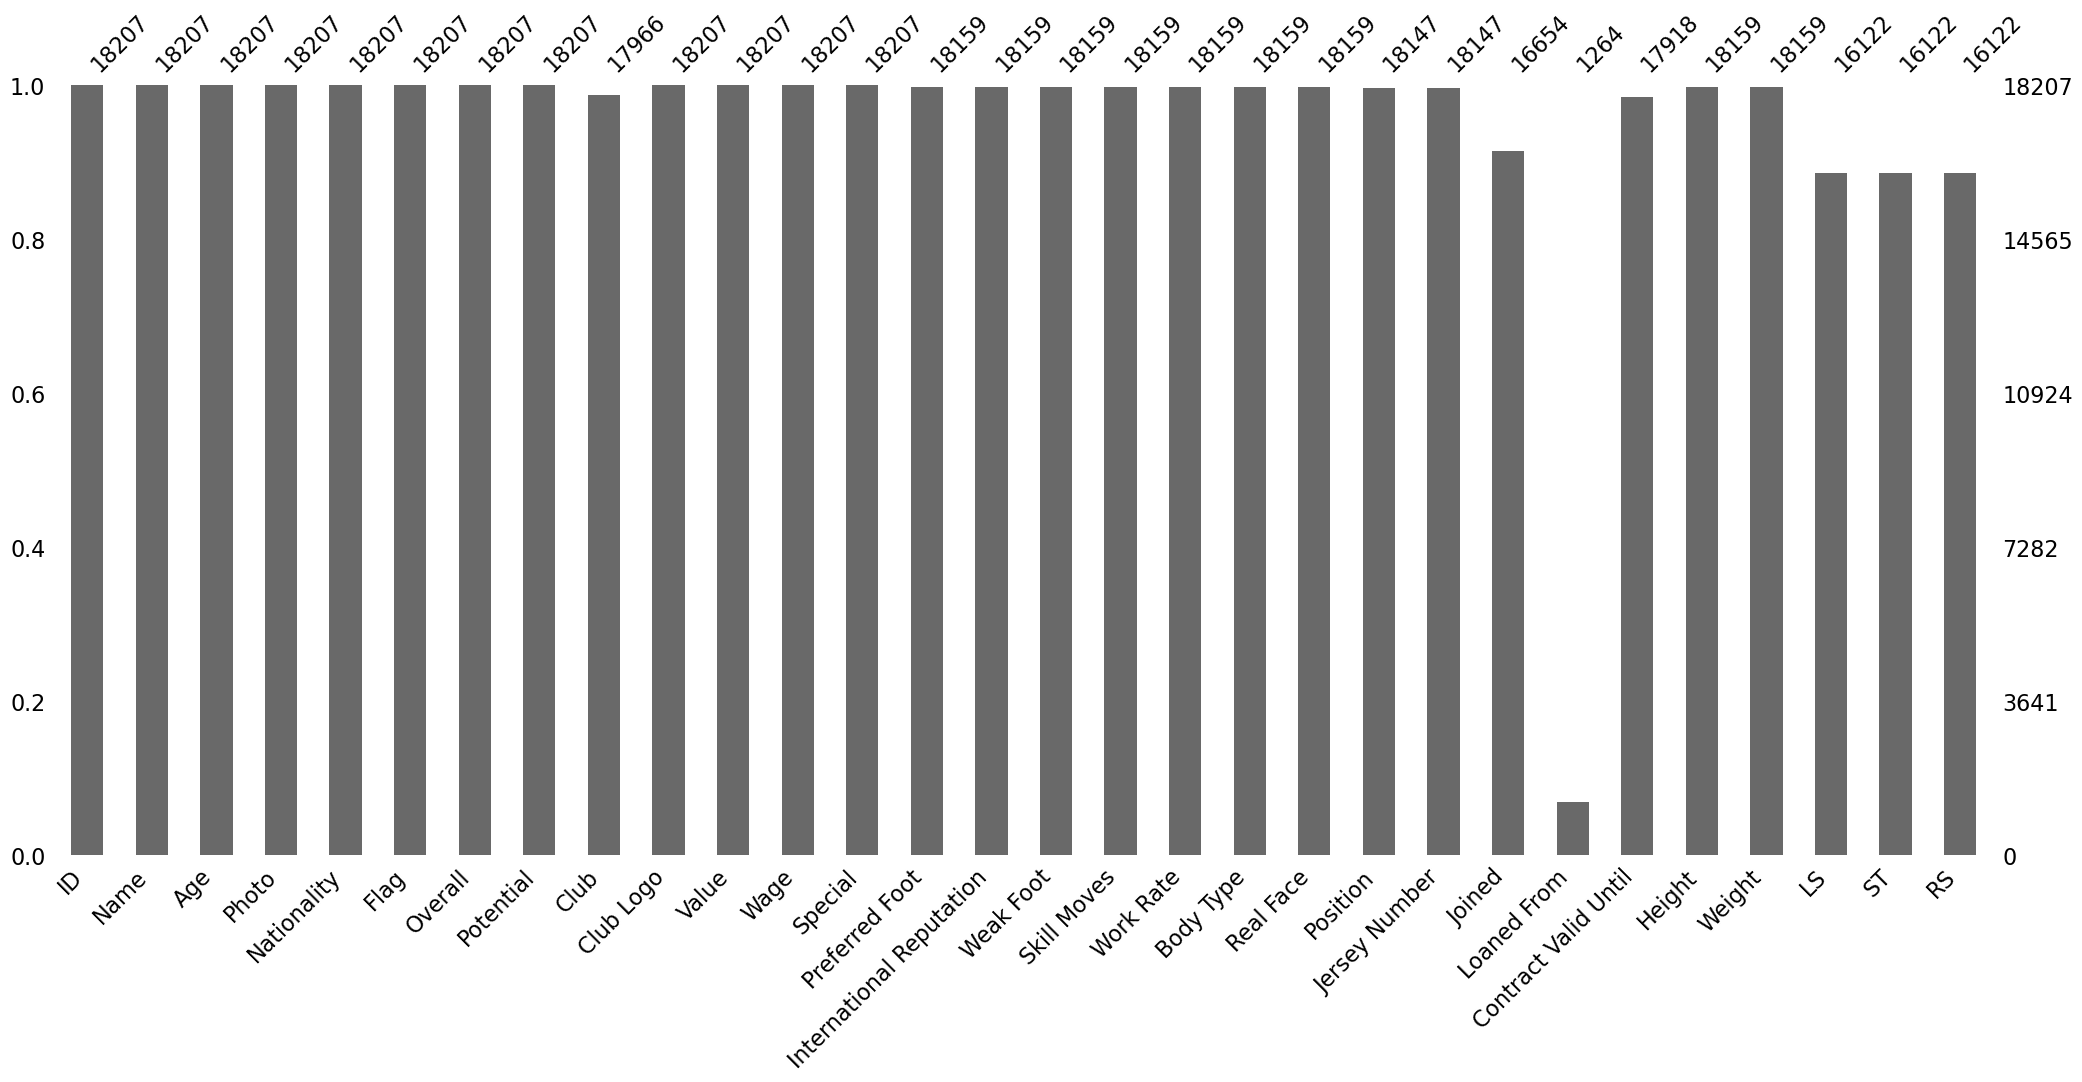

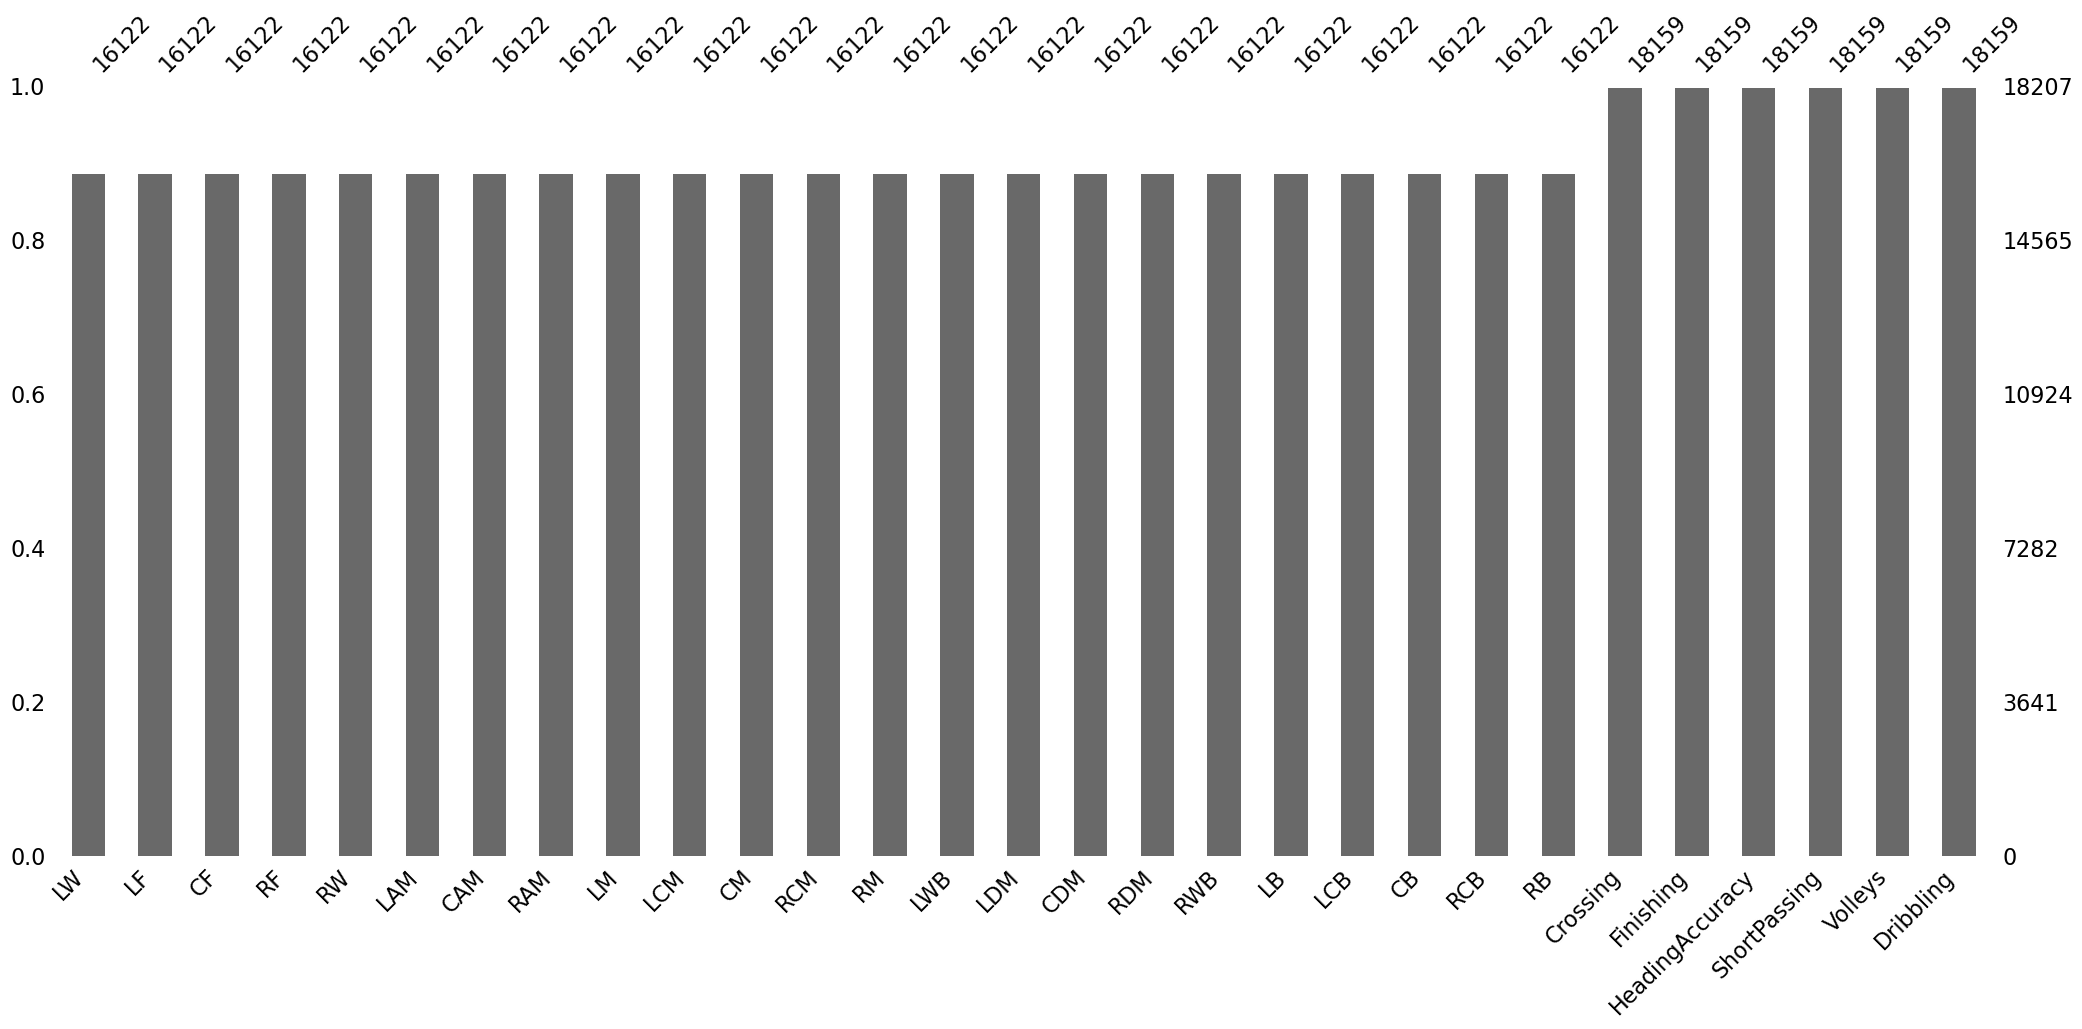

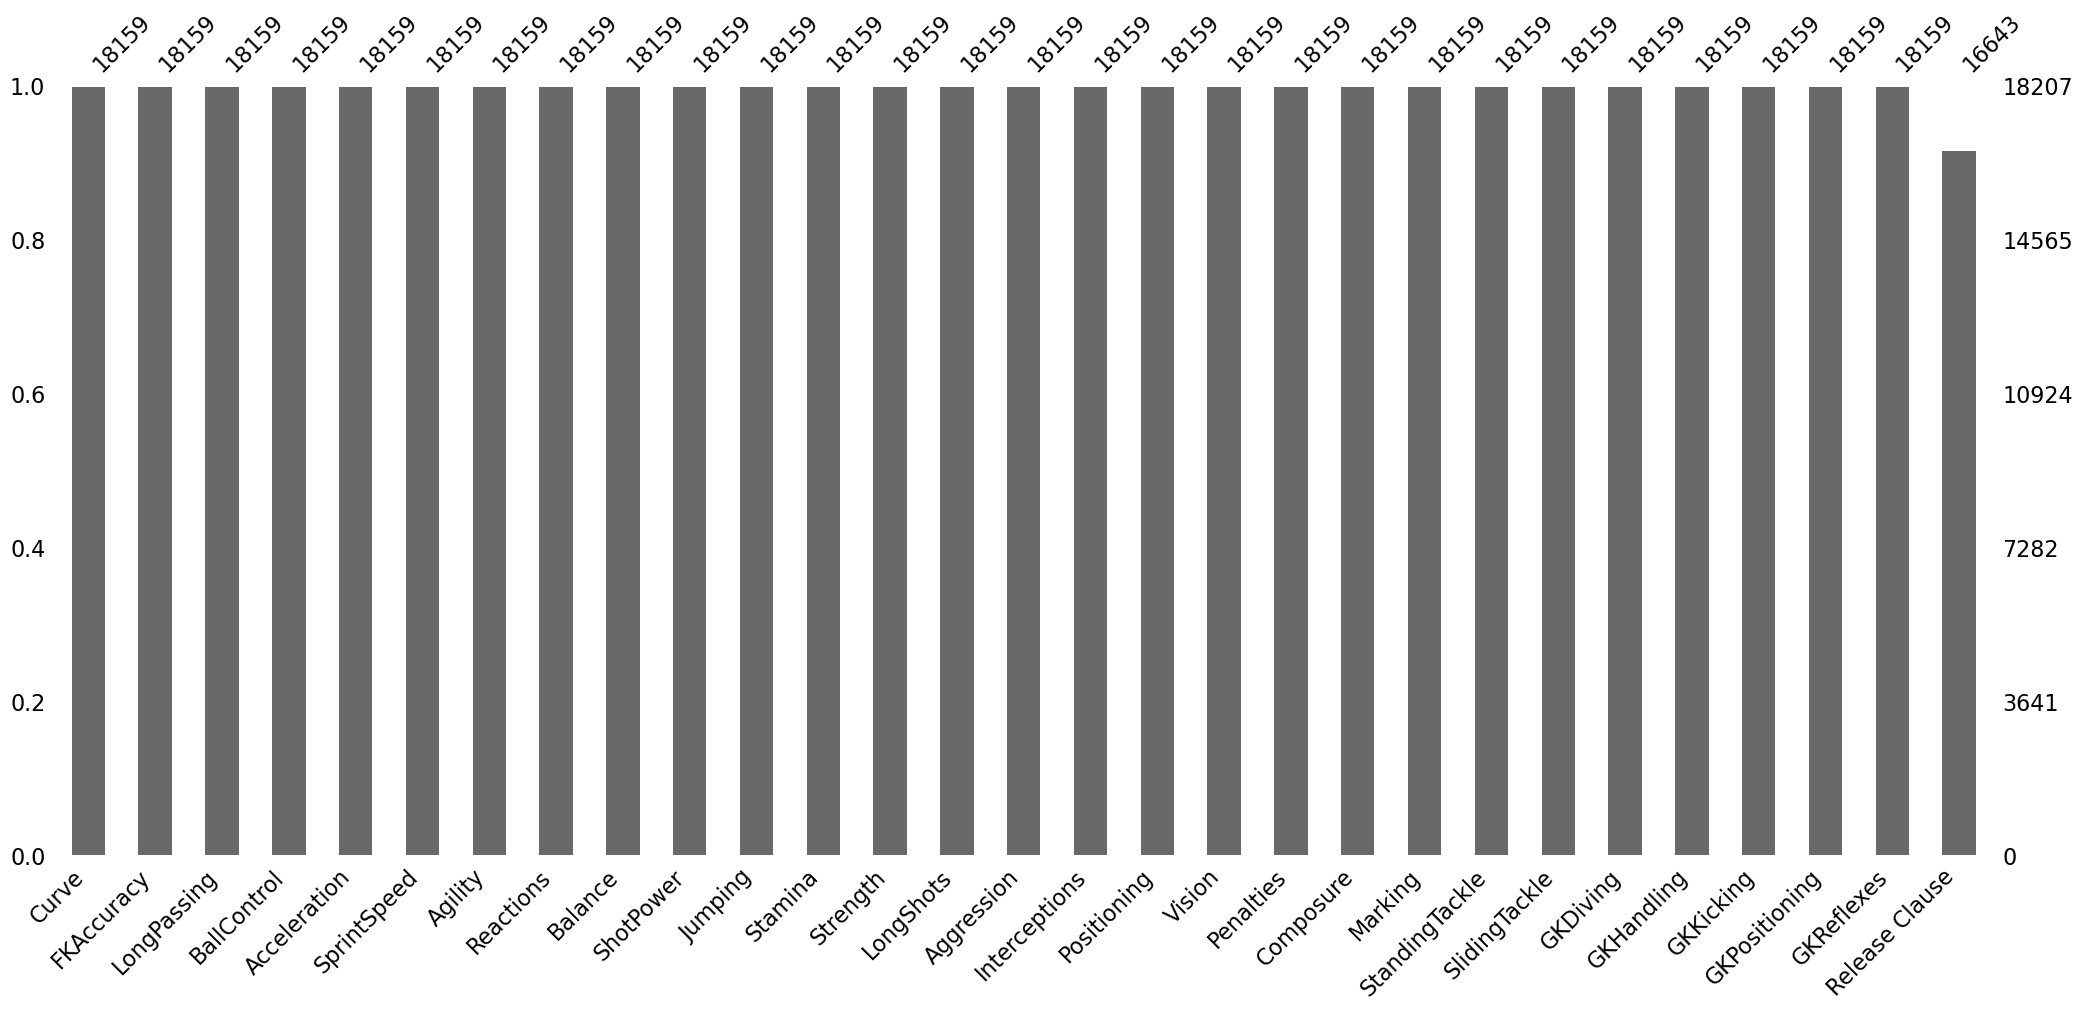

In [5]:
#check missing data
plots = 3
column_groups = np.array_split(df.columns, plots)
for group in column_groups:
    msno.bar(df[group])
    plt.show()

## Notes about Null vlaues

#### 1) Missing Data in columns with common subject
- There are missing value in all columns related to player skills (Crossing, Finishing, .....)
- There are missing value in all columns related to player position in the field (LS, ST, ...), Is it for Goal Keepers?

#### 2) Missing Data in columns with individual subject
- Club - some players can be "free agent" and without the club
- Jersey Number - some players might not have a jersey number when they are without he club
- Joined - indicates when a player joined the club, not sure why there are a missing values
- Loaned From - not every player is on loan
- Contract Valid Until - some players might miss this value, espacially those without the club
- Release Clause - this is ok, some players may have release clause in their contract

## Data Cleaning

### 1- Remove spaces in column names

In [6]:
#replace space in column names with "_" and make it lower case
df.columns = df.columns.str.replace(" ","_")

### 2- Handling missing data

#### 2.1) Players with missing skills

In [7]:
#players with missing skilss
df[df.Crossing.isnull()].head()

ID         Name  Age  \
13236  177971   J. McNulty   33   
13237  195380   J. Barrera   29   
13238  139317     J. Stead   35   
13239  240437  A. Semprini   20   
13240  209462   R. Bingham   24   

                                                Photo Nationality  \
13236  https://cdn.sofifa.org/players/4/19/177971.png    Scotland   
13237  https://cdn.sofifa.org/players/4/19/195380.png   Nicaragua   
13238  https://cdn.sofifa.org/players/4/19/139317.png     England   
13239  https://cdn.sofifa.org/players/4/19/240437.png       Italy   
13240  https://cdn.sofifa.org/players/4/19/209462.png     England   

                                      Flag  Overall  Potential  \
13236  https://cdn.sofifa.org/flags/42.png       62         62   
13237  https://cdn.sofifa.org/flags/86.png       62         62   
13238  https://cdn.sofifa.org/flags/14.png       62         62   
13239  https://cdn.sofifa.org/flags/27.png       62         72   
13240  https://cdn.sofifa.org/flags/14.png       62         66   

                         Club  \
13236                Rochdale   
13237         Boyacá Chicó FC   
13238            Notts County   
13239                 Brescia   
13240  Hamilton Academical FC   

                                             Club_Logo  ... Composure Marking  \
13236    https://cdn.sofifa.org/teams/2/light/1955.png  ...       NaN     NaN   
13237  https://cdn.sofifa.org/teams/2/light/112019.png  ...       NaN     NaN   
13238    https://cdn.sofifa.org/teams/2/light/1937.png  ...       NaN     NaN   
13239     https://cdn.sofifa.org/teams/2/light/190.png  ...       NaN     NaN   
13240     https://cdn.sofifa.org/teams/2/light/184.png  ...       NaN     NaN   

       StandingTackle SlidingTackle  GKDiving  GKHandling  GKKicking  \
13236             NaN           NaN       NaN         NaN        NaN   
13237             NaN           NaN       NaN         NaN        NaN   
13238             NaN           NaN       NaN         NaN        NaN   
13239             NaN           NaN       NaN         NaN        NaN   
13240             NaN           NaN       NaN         NaN        NaN   

      GKPositioning GKReflexes Release_Clause  
13236           NaN        NaN            NaN  
13237           NaN        NaN            NaN  
13238           NaN        NaN            NaN  
13239           NaN        NaN            NaN  
13240           NaN        NaN            NaN  

[5 rows x 88 columns]

In [8]:
#same players have missing rating for position on the field
df[df.Crossing.isnull()]['ST'].isnull().sum()

48

In [9]:
#remove players with missing skills
df = df.dropna(subset= ['Crossing'])

#### 2.2) Players with missing field position

In [10]:
#how many rows with missing values for palyer position in the field
df.LS.isnull().sum()

2037

In [11]:
#Check how many GK we have
df[df.LS.isnull()]['Position'].value_counts(dropna= False)

GK     2025
NaN      12
Name: Position, dtype: int64

- There are 12 row with missing data too, They are may be one of two options
 - They are GK and we need to impute postion column with GK
 - They are not GK and need to delete these row
 
 If these 12 rows has average of any GK skills such as 'GKKicking'  equal to GK 'GKKicking' we will consider their position as GK

In [12]:
#mean values for GKPositioning of 12 rows with missing posoition ratings
missing_field_position = df[df.LS.isnull()]
missing_field_position[missing_field_position.Position.isnull()]['GKPositioning'].mean()

15.25

In [13]:
#mean values for GKPositioning of GoalKeepers
df[df.Position == 'GK']['GKPositioning'].mean()

63.047407407407405

- These 12 palyers are not GK, we will remove them

In [14]:
#drop 12 rows 
df.dropna(subset = ['Position'], inplace= True)

#### 2.3 Other columns with missing values

In [15]:
#If the player don't hav a club, all columns [Club, Joined, Loaned_From, Contract_Valid_Until] will be "Free-Agent"
df['Club'].fillna('Free_Agent', inplace = True)
df.loc[df['Club'] == "Free_Agent", 'Joined'] = "Free_Agent"
df.loc[df['Club'] == "Free_Agent", 'Loaned_From'] = "Free_Agent"
df.loc[df['Club'] == "Free_Agent", 'Contract_Valid_Until'] = "Free_Agent"
df.loc[df['Club'] == "Free_Agent", 'Release_Clause'] = "Free_Agent"

In [16]:
#Fill null values of Loaned_From to be Not on Loan
df.Loaned_From.fillna("Not on Loan", inplace = True)

In [17]:
#Fill null values of Release_Clause to be No Release Clause
df.Release_Clause.fillna("No Release Clause", inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18147 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18147 non-null  int64  
 1   Name                      18147 non-null  object 
 2   Age                       18147 non-null  int64  
 3   Photo                     18147 non-null  object 
 4   Nationality               18147 non-null  object 
 5   Flag                      18147 non-null  object 
 6   Overall                   18147 non-null  int64  
 7   Potential                 18147 non-null  int64  
 8   Club                      18147 non-null  object 
 9   Club_Logo                 18147 non-null  object 
 10  Value                     18147 non-null  object 
 11  Wage                      18147 non-null  object 
 12  Special                   18147 non-null  int64  
 13  Preferred_Foot            18147 non-null  object 
 14  Intern

<a id='eda'></a>
# `3.` Exploratory Data Analysis

### 1- Palyers Age

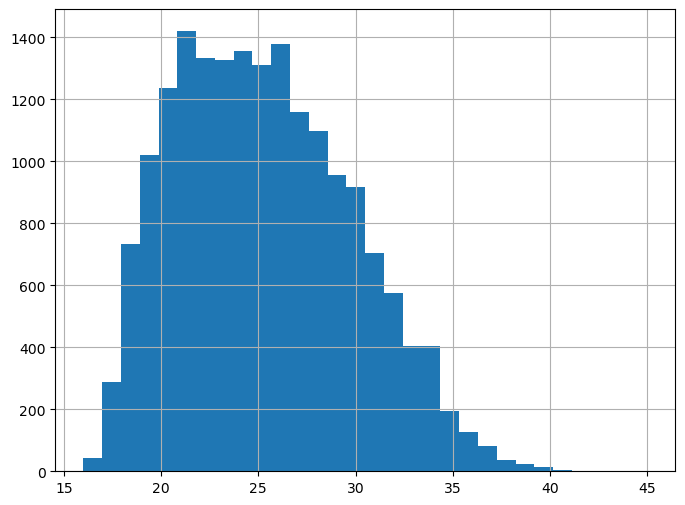

In [19]:
# Player ages
df['Age'].hist(bins = 30, figsize = (8,6));

In [20]:
np.percentile((df['Age']),25), np.percentile((df['Age']),75)

(21.0, 28.0)

In [21]:
np.percentile((df['Age']),95)

33.0

- The age distirbution is right skweed, most players age between 21 and 28
- 5 % of palyers are over 33 years

### Check position of players over 33

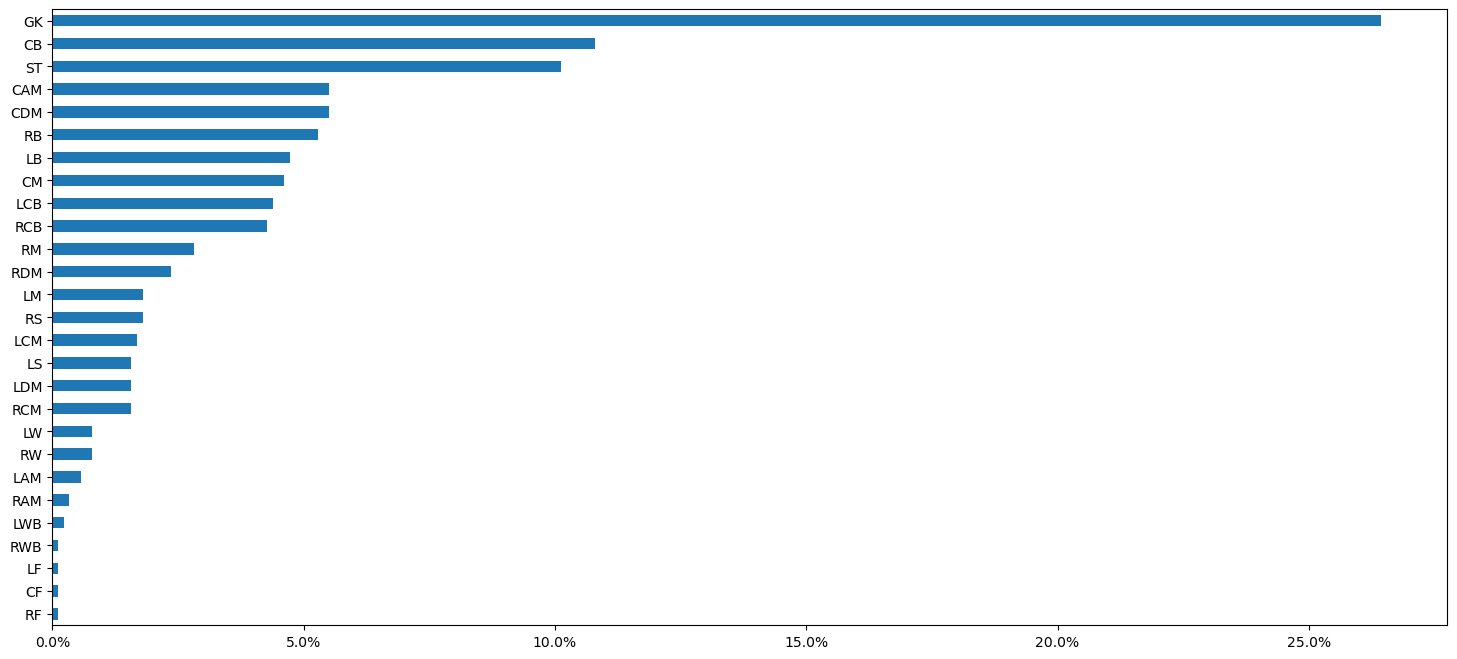

In [22]:
#Players over 33
fig, ax = plt.subplots(figsize=(18,8))
ax = (df[df.Age > 33]['Position'].value_counts(ascending = True)*100/len(df[df.Age > 33])).plot(kind = 'barh', figsize = (18,8))
ax.xaxis.set_major_formatter(mtick.PercentFormatter())


- 25% of players over 33 are GKs
- Players position ST and CB represent roughly another 25% 

### 2- Overall rating

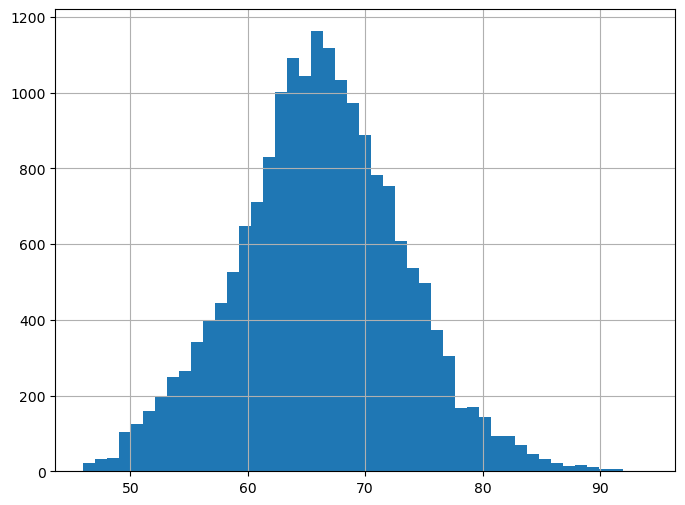

In [23]:
# Overall Rating
df['Overall'].hist(bins = 47,figsize = (8,6));

- Palyers overall rating has a normal distribution

### 3- Wages

In [24]:
#change wages to numeruc
df['Wage_Num'] = df.Wage.str.replace('K','')
df['Wage_Num']= df['Wage_Num'].str[1:]
df['Wage_Num'] = df.Wage_Num.astype('float')

In [25]:
#Name of 10 palyers having most wages 
display(HTML(df[df.Wage_Num > 200].loc[:,['Name','Club','Position','Wage']].head(10).to_html(index= False)))

''

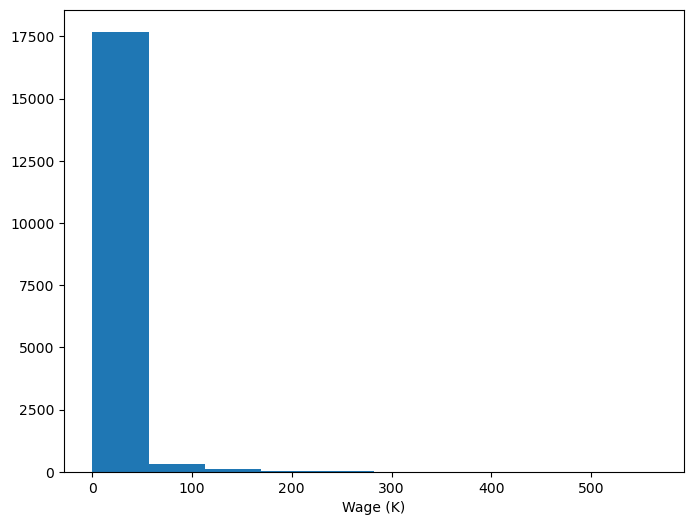

In [26]:
# Wages distribution
df.Wage_Num.hist(figsize = (8,6), grid = False)
plt.xlabel('Wage (K)')
;

- let's convert the x scale to log scale

In [27]:
#to convert the scale to log, remove zero value to get the correct bin number
np.log10(df[df.Wage_Num >0]['Wage_Num']).describe()

count    17918.000000
mean         0.595169
std          0.534873
min          0.000000
25%          0.000000
50%          0.477121
75%          0.954243
max          2.752048
Name: Wage_Num, dtype: float64

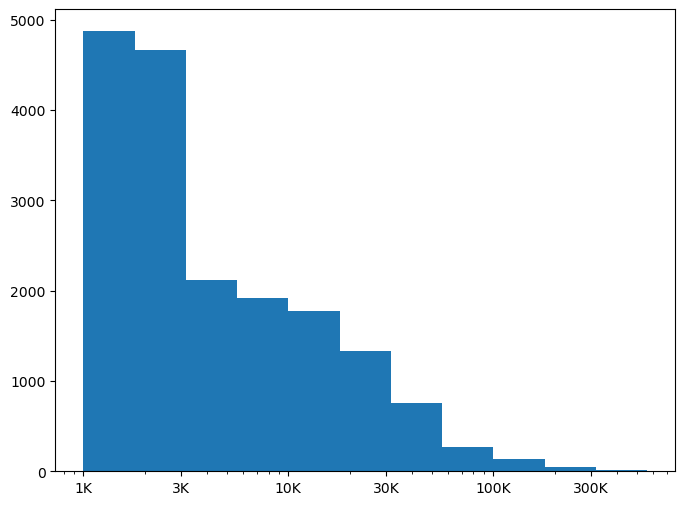

In [28]:
#check the duration seconds distribution in log scale
wage_bins = 10 ** np.arange(0, np.log10(df.Wage_Num.max())+0.2, 0.25)
df.Wage_Num.hist(bins = wage_bins, figsize = (8,6), grid = False)
plt.xscale('log')
plt.xticks([1, 3, 10, 30 ,100, 300], ["1K", '3K' ,'10K', '30K', '100K', '300K']);

### 4- Value

In [29]:
#change Value to numeric

#Remove Euro sign
df['Value_Num'] = df.Value.str[1:]
#convert the remaing value baseed on M = Million or K = Thousand
df['Value_Num'] = df['Value_Num'].apply(lambda X : float(X[:-1])*1e6 if X[-1] == 'M' else (float(X[:-1])*1e3 if X[-1] == 'K' else X))


In [30]:
df['Value_Num'] = df['Value_Num'].astype('float')

''

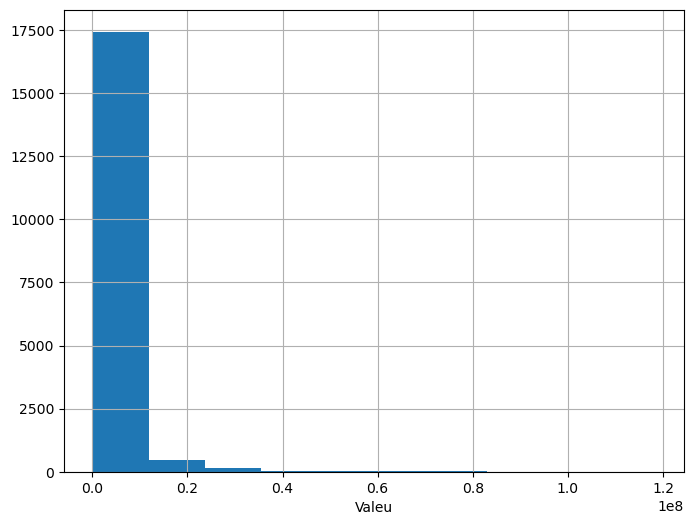

In [31]:
# Overall Rating
#exclude players with zero value first
df.Value_Num.hist(figsize = (8,6))
plt.xlabel('Valeu')
;

In [32]:
#to convert the scale to log, remove zero value to get the correct bin number
np.log10(df[df.Value_Num > 0]['Value_Num']).describe()

count    17907.000000
mean         5.916318
std          0.611107
min          4.000000
25%          5.511883
50%          5.845098
75%          6.322219
max          8.073718
Name: Value_Num, dtype: float64

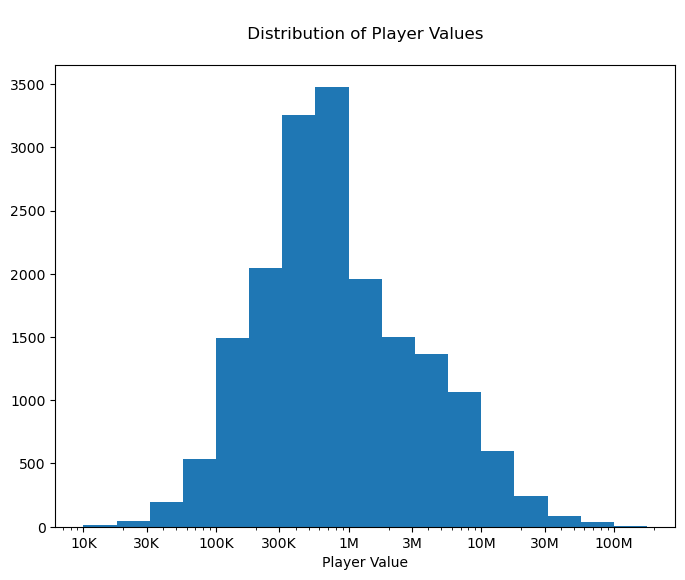

In [33]:
#check the duration seconds distribution in log scale
bins = 10 ** np.arange(4, np.log10(df.Value_Num.max())+0.2, 0.25)
df.Value_Num.hist(bins = bins, figsize = (8,6), grid = False)
plt.xscale('log')
plt.xlabel('Player Value')
plt.title('\n Distribution of Player Values \n')
plt.xticks([10e3, 30e3, 10e4, 30e4 ,1e6, 3e6, 10e6, 30e6, 100e6], ["10K", '30K' ,'100K', '300K', '1M', '3M', '10M', '30M', '100M']);

### 5- Body Type

In [34]:
df.Body_Type.value_counts()

Normal                 10588
Lean                    6412
Stocky                  1140
PLAYER_BODY_TYPE_25        1
Akinfenwa                  1
Shaqiri                    1
Neymar                     1
Courtois                   1
Messi                      1
C. Ronaldo                 1
Name: Body_Type, dtype: int64

- Body types are [Normal, Lean and Stocky], there are unique body shape for some players

In [35]:
#remove unique body shapes
body_shape = ['Normal', 'Lean', 'Stocky']
df[df.Body_Type.isin(body_shape)]['Body_Type'].value_counts()

Normal    10588
Lean       6412
Stocky     1140
Name: Body_Type, dtype: int64

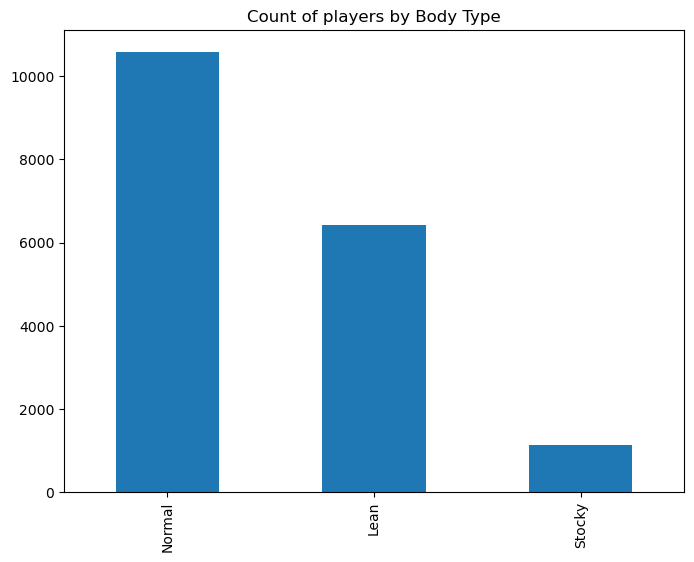

In [36]:
df[df.Body_Type.isin(body_shape)]['Body_Type'].value_counts().plot(kind = 'bar', figsize = (8,6))
plt.title('Count of players by Body Type');

### 6- Prefered Foot

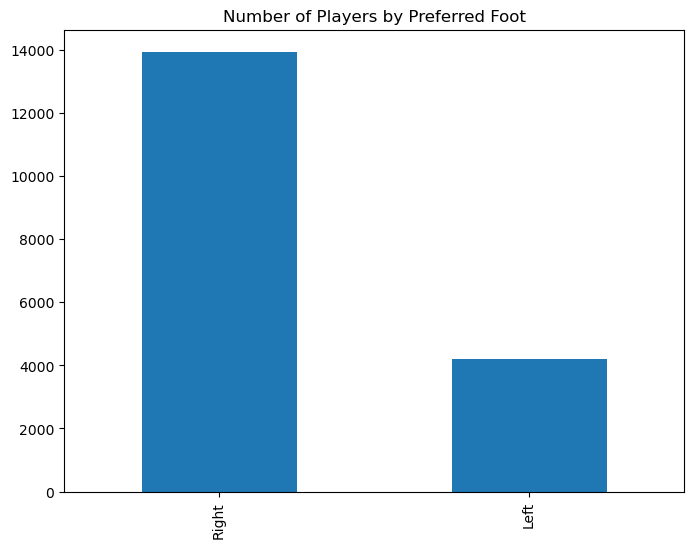

In [37]:
df.Preferred_Foot.value_counts().plot(kind = 'bar', figsize = (8,6))
plt.title('Number of Players by Preferred Foot');

### 7- Nationality

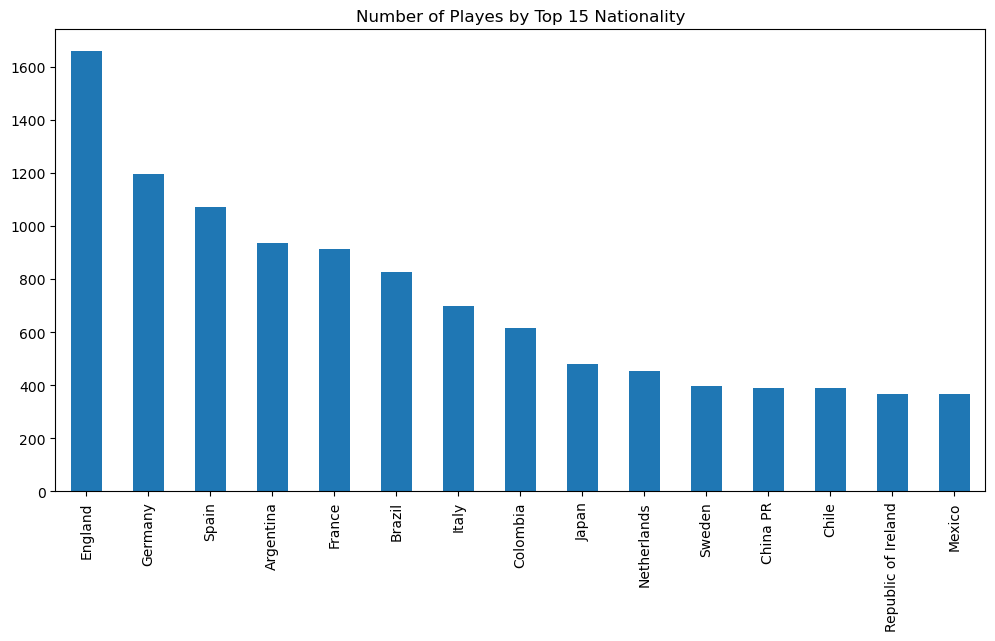

In [38]:
df.Nationality.value_counts().nlargest(15).plot(kind = 'bar', figsize = (12,6), grid = False)
plt.title('Number of Playes by Top 15 Nationality');

- England has the most football players count

### 8- Work Rate

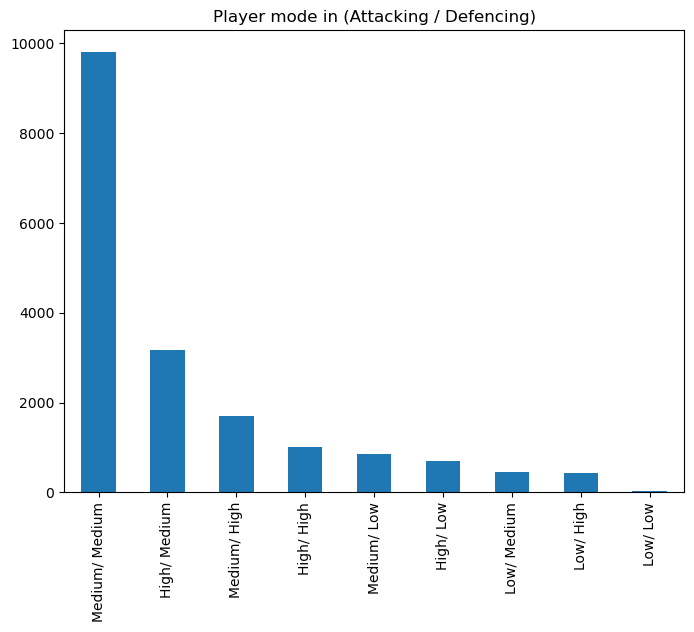

In [39]:
df.Work_Rate.value_counts().plot(kind = 'bar', figsize = (8,6))
plt.title('Player mode in (Attacking / Defencing)');

# Questions

### 1 - Who is best player in each position?

In [40]:
display(HTML(df.iloc[df.groupby('Position')['Overall'].idxmax()][['Name','Position']].to_html(index= False)))

### 2- Does the player value correlated with overall rating?

''

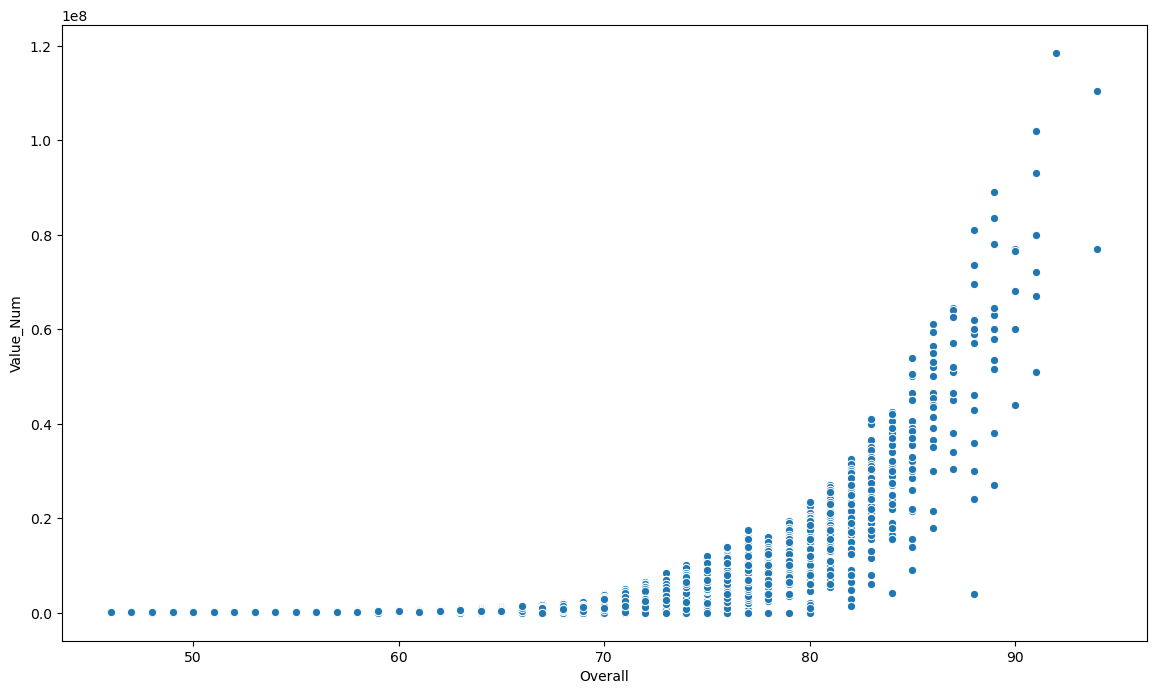

In [41]:
fig, ax = plt.subplots(figsize = (14,8))
ax = sns.scatterplot(data = df, x = 'Overall', y= 'Value_Num')
;

- Since the players values has a log scale, lets try to show the realtion with log scal and check the variance of values in each rating

''

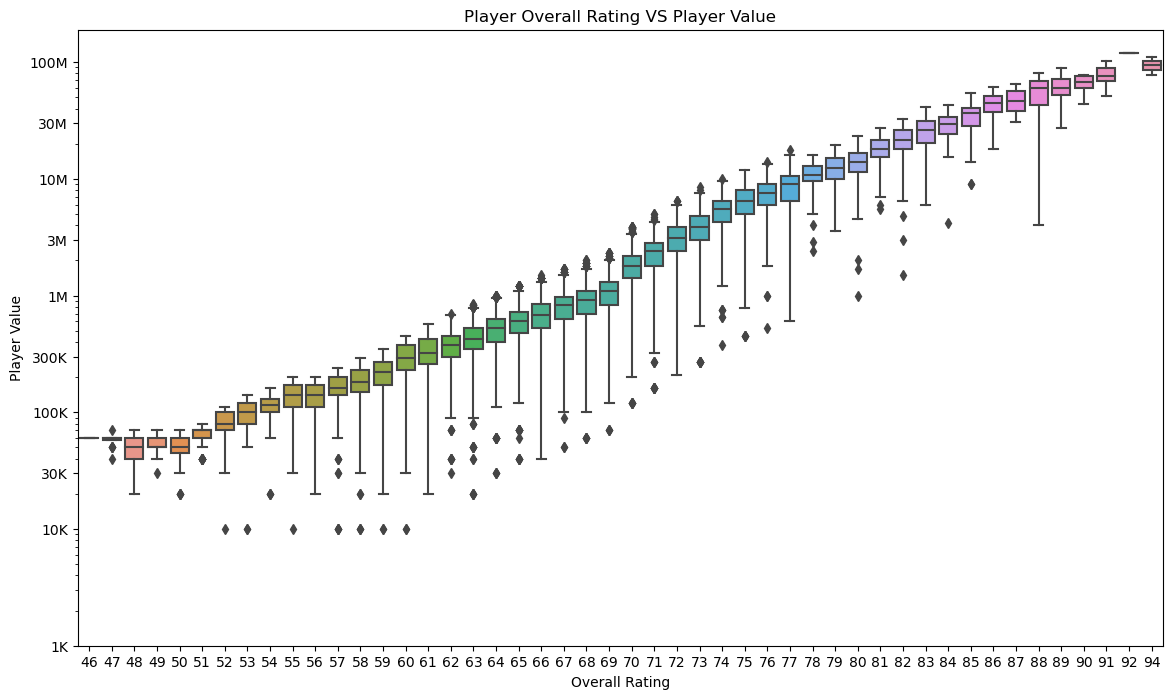

In [42]:
#convert the scale of value to Logarithmic and choose Box Plot to show IQR and outliers 
fig, ax = plt.subplots(figsize = (14,8))
ax = sns.boxplot(data = df, x = 'Overall', y= 'Value_Num')
plt.yscale('log')
plt.yticks([1e3, 10e3, 30e3, 10e4, 30e4 ,1e6, 3e6, 10e6, 30e6, 100e6], ["1K","10K", '30K' ,'100K', '300K', '1M', '3M', '10M', '30M', '100M'])
plt.title('Player Overall Rating VS Player Value')
plt.ylabel('Player Value')
plt.xlabel('Overall Rating')
;

- There is a wide range of player vlaues for same rating
- Let's change the plot to scatter plot add another variable to understand why this variance happend

''

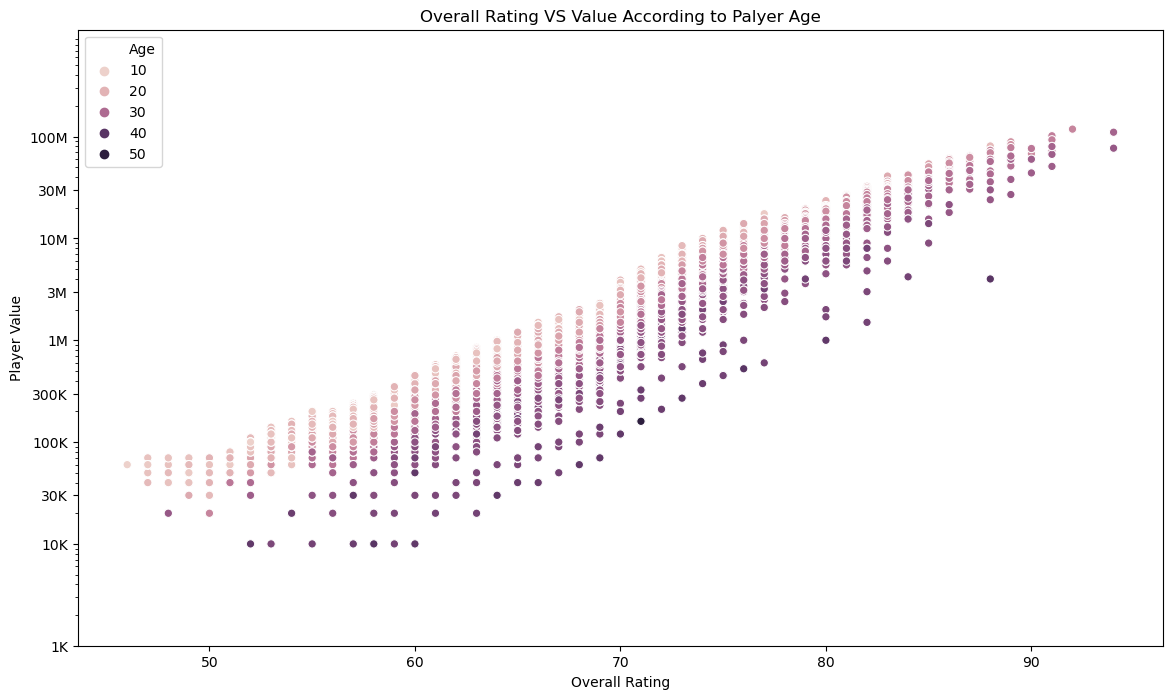

In [43]:
fig, ax = plt.subplots(figsize = (14,8))
ax = sns.scatterplot(data = df, x = 'Overall', y= 'Value_Num', hue = 'Age')
plt.yscale('log')
plt.yticks([1e3, 10e3, 30e3, 10e4, 30e4 ,1e6, 3e6, 10e6, 30e6, 100e6], ["1K","10K", '30K' ,'100K', '300K', '1M', '3M', '10M', '30M', '100M'])
plt.title('Overall Rating VS Value According to Palyer Age')
plt.ylabel('Player Value')
plt.xlabel('Overall Rating')
;

- There is a strong positive correlation bwtween player rating and its vlaue
- There is a wide range of player vlaues for same rating because of palyer age

### 3- Which clubs with high overall rating?

''

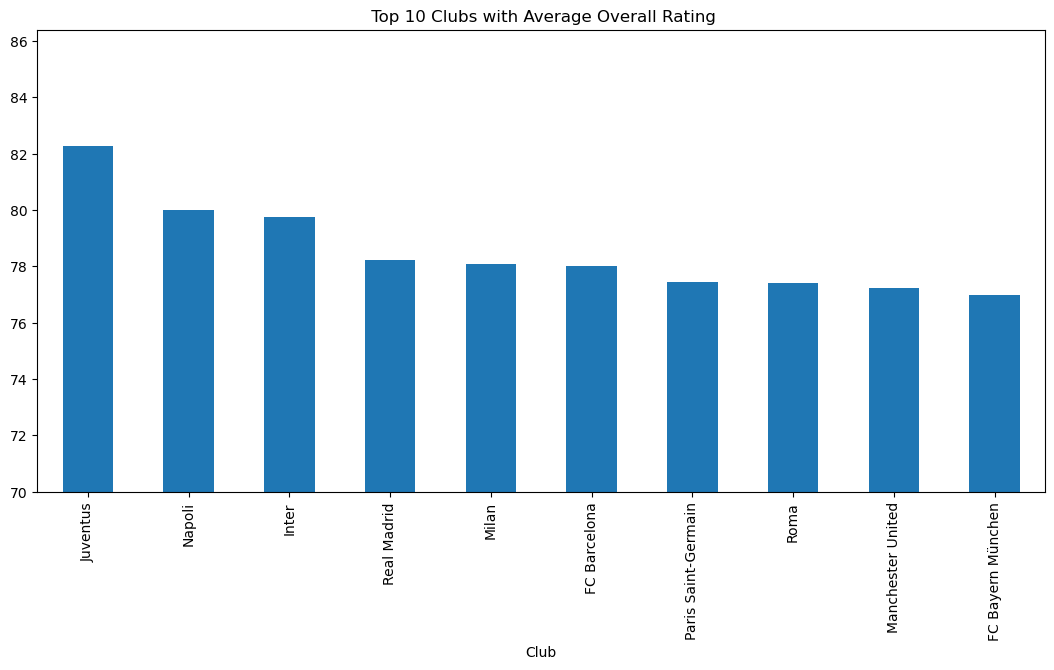

In [44]:
df.groupby('Club')['Overall'].mean().nlargest(10).plot(kind = 'bar', figsize=(13,6), grid = False)
plt.ylim(70)
plt.title(' Top 10 Clubs with Average Overall Rating')
;

- Five of Top Ten clubs with overall players rating in **Serie A**

### 4- Which Clubs Paying More Wages?

''

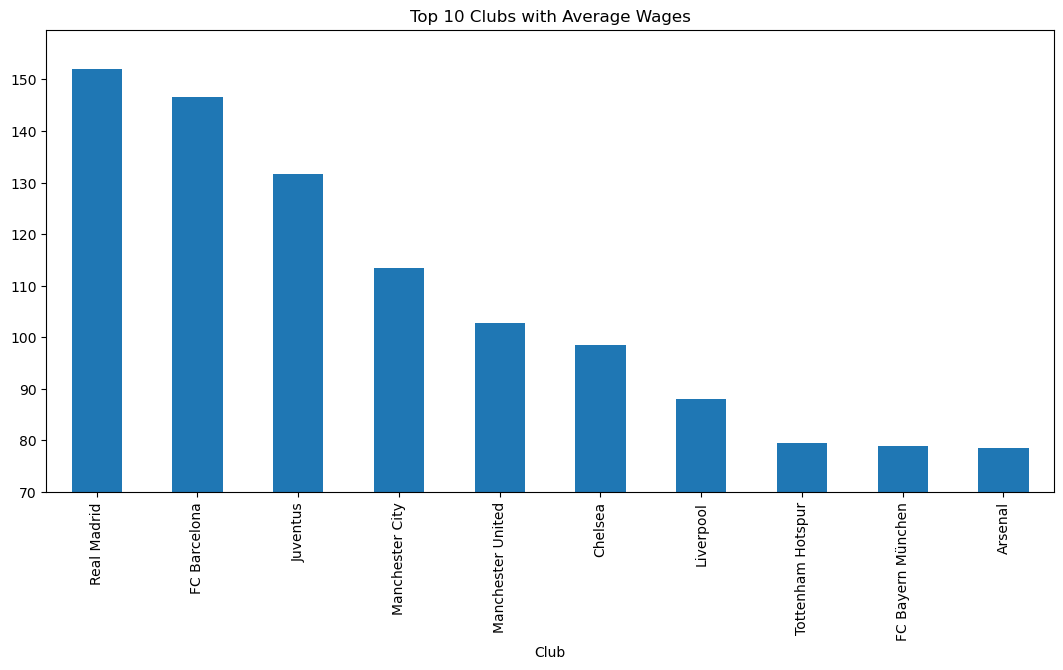

In [45]:
df.groupby('Club')['Wage_Num'].mean().nlargest(10).plot(kind = 'bar', figsize=(13,6), grid = False)
plt.ylim(70)
plt.title('Top 10 Clubs with Average Wages')
;

- The clubs of most famous clasico (**Real Madrid** and **FC Barcelona**) are spending most wages for palyers
- Five Clubs from the Preimer Leage are in Top Ten list

### 5- Does players with Left Foot have more wage than others?

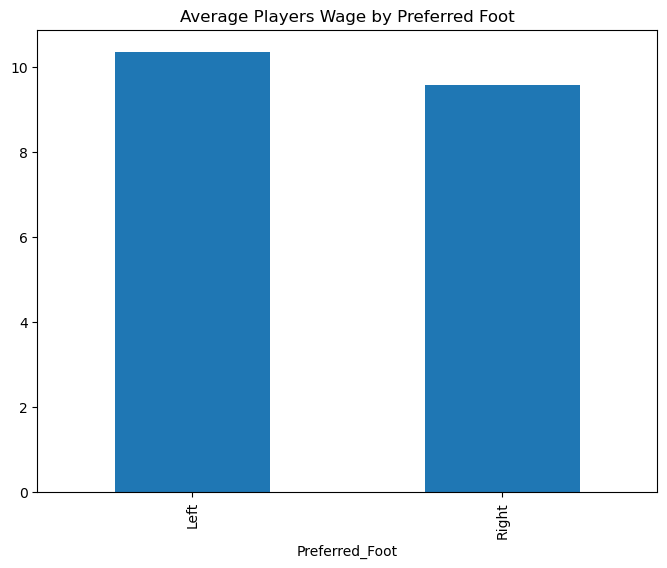

In [46]:
df.groupby('Preferred_Foot')['Wage_Num'].mean().plot(kind = 'bar', figsize = (8,6))
plt.title('Average Players Wage by Preferred Foot');

### 6- Does palyers have good ball control if they can play with booth foots?

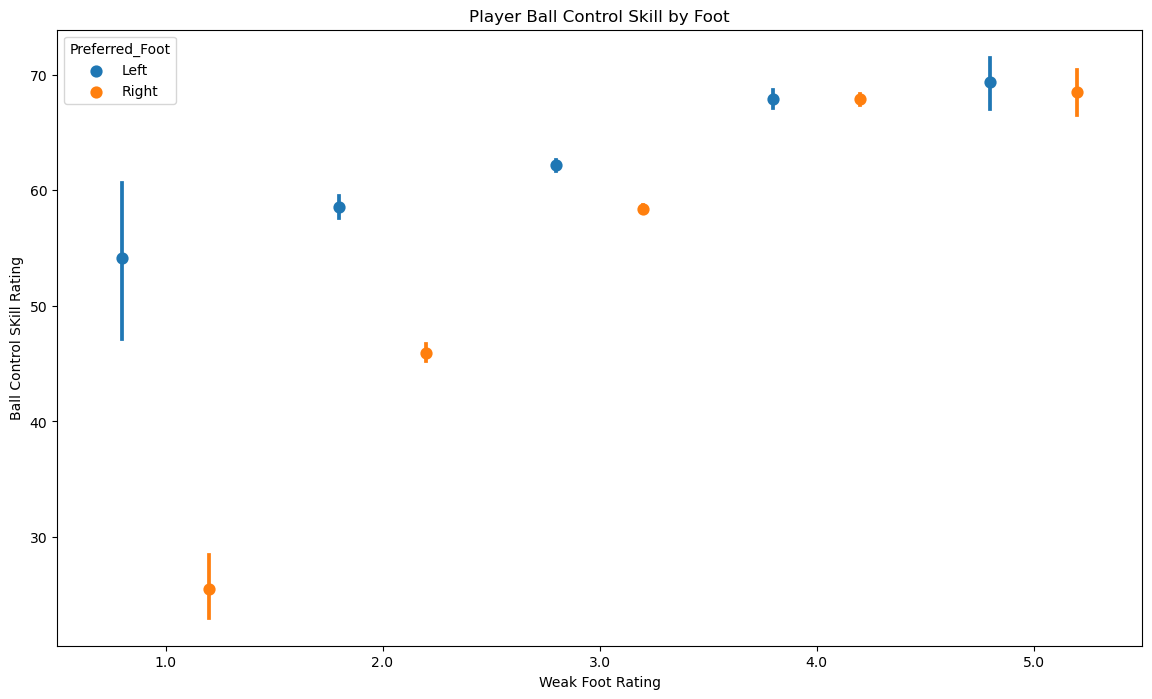

In [47]:
fig, ax = plt.subplots(figsize = (14,8))
stricker = ['ST','LS', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
ax = sns.pointplot(data = df, x = 'Weak_Foot', y= 'BallControl',
                   hue = 'Preferred_Foot', dodge = 0.4, linestyles = '')

plt.title('Player Ball Control Skill by Foot')
plt.ylabel('Ball Control SKill Rating')
plt.xlabel('Weak Foot Rating');


- Players can play with both foots have a high ratiog of Ball Control Skill

### 7- Which young players could become future stars in their positions?

In [48]:
#create progress column
df['Progress'] = df['Potential']- df['Overall']

In [49]:
#players with height progress
print('\n Top 10 Player with Highest Potential Progress \n')
display(HTML(df.sort_values('Progress', ascending = False).head(10).loc[:,['Name', 'Age', 'Nationality', 'Club', 'Progress']].to_html(index= False)))


 Top 10 Player with Highest Potential Progress 



In [50]:

print('\n Top 10 Players with Highest Potential Progress Having Overall Rating Above 70 \n')

display(HTML(df[df.Overall > 70].sort_values('Progress', ascending = False).head(10).loc[:,['Name', 'Age', 'Nationality', 'Club', 'Progress']].to_html(index= False)))


 Top 10 Players with Highest Potential Progress Having Overall Rating Above 70 



### 8- Which position has the tallest players?

In [51]:
#Change Height from inches to CM
df['Height_CM'] = df['Height'].str.split("'")
df['Height_CM'] = df['Height_CM'].apply(lambda X: (float(X[0])*12 + float(X[-1])) * 2.54)

''

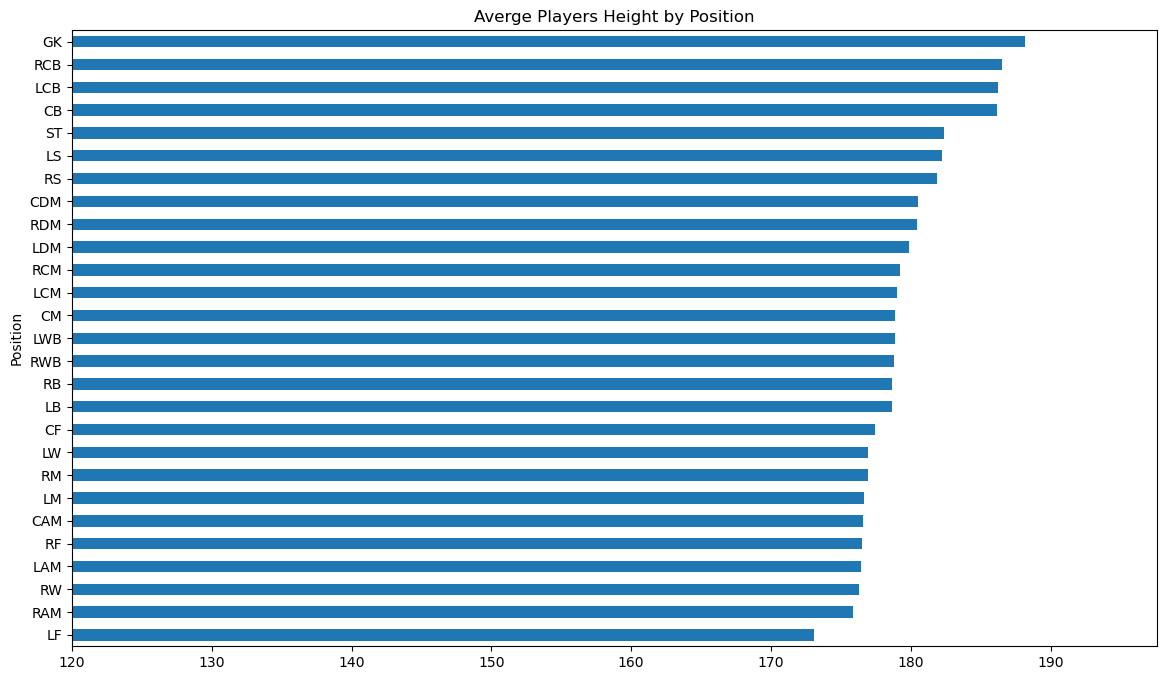

In [52]:
fig, ax = plt.subplots(figsize = (14,8))
df.groupby('Position')['Height_CM'].mean().sort_values().plot(kind = 'barh')
plt.title('Averge Players Height by Position')
plt.xlim(120)
;

- Goalkeepers, Center Backs and Strikers are with most height on average
- It seems logic as players of these positions trying to reach the flying balls inside the box

### 9- What Is the relation between player height and heading accuracy?

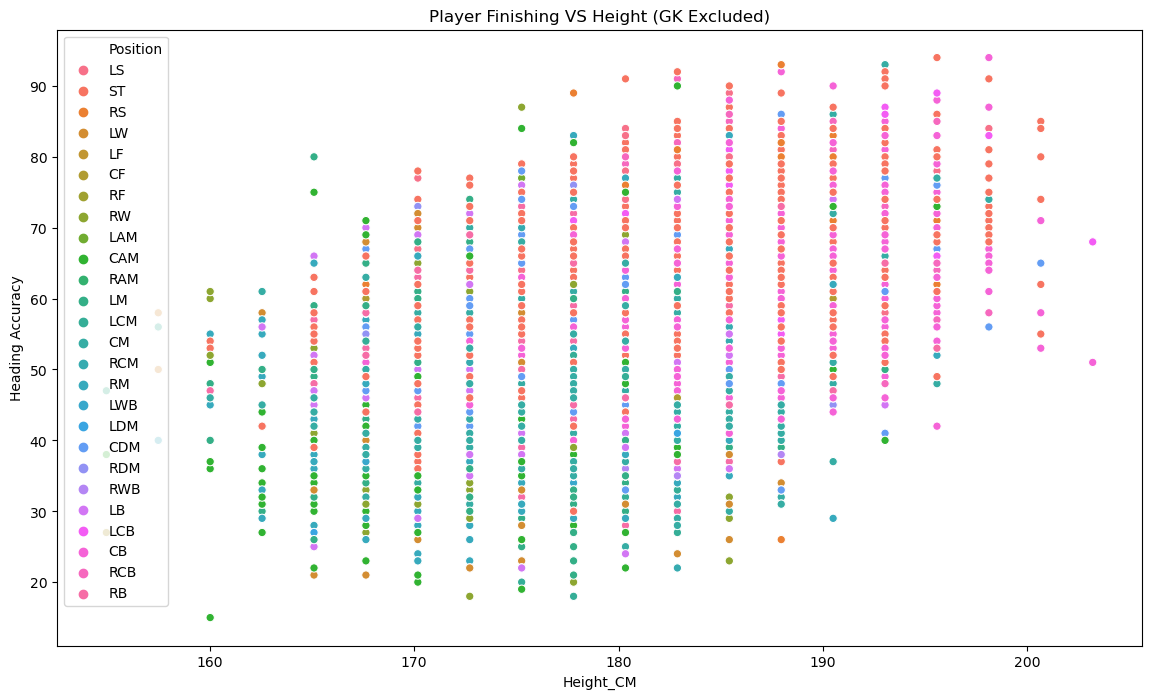

In [53]:
#exclude Goalkeeper from the data
fig, ax = plt.subplots(figsize = (14,8))
hue_order = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',
             'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
ax = sns.scatterplot(data = df[df.Position != 'GK'], x = 'Height_CM', y= 'HeadingAccuracy', hue = 'Position', hue_order = hue_order)
plt.title('Player Finishing VS Height (GK Excluded)')
plt.ylabel('Heading Accuracy')
plt.xlabel('Height_CM');

- There is positive correlation between player height and Heading Accuracy
- Center backs and strikers,typically have the most height on average due to the advantage it offers in aerial challenges.

### 10- Which features make player suitable for a position ?

In [54]:
player_features = ['Acceleration', 'Aggression', 'Agility', 
                'Balance', 'BallControl', 'Composure', 
                'Crossing', 'Dribbling', 'FKAccuracy', 
                'Finishing', 'GKDiving', 'GKHandling', 
                'GKKicking', 'GKPositioning', 'GKReflexes', 
                'HeadingAccuracy', 'Interceptions', 'Jumping', 
                'LongPassing', 'LongShots', 'Marking', 'Penalties']

for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    
    print('Postion {}:  {}, {}, {}, {}'.format(i, *list(val.nlargest(4).index)))
  

Postion CAM:  Balance, Agility, Acceleration, BallControl
Postion CB:  Jumping, Aggression, HeadingAccuracy, Marking
Postion CDM:  Aggression, Jumping, Balance, BallControl
Postion CF:  Agility, Balance, Acceleration, Dribbling
Postion CM:  Balance, Agility, Acceleration, BallControl
Postion GK:  GKReflexes, GKDiving, GKPositioning, GKHandling
Postion LAM:  Agility, Balance, Acceleration, Dribbling
Postion LB:  Acceleration, Balance, Agility, Jumping
Postion LCB:  Jumping, Aggression, HeadingAccuracy, Marking
Postion LCM:  Balance, Agility, BallControl, LongPassing
Postion LDM:  Aggression, BallControl, LongPassing, Balance
Postion LF:  Balance, Agility, Acceleration, Dribbling
Postion LM:  Acceleration, Agility, Balance, Dribbling
Postion LS:  Acceleration, Agility, Finishing, Jumping
Postion LW:  Acceleration, Agility, Balance, Dribbling
Postion LWB:  Acceleration, Agility, Balance, Jumping
Postion RAM:  Agility, Balance, Acceleration, Dribbling
Postion RB:  Acceleration, Balance, Ju

# Comparing player 

- To compare players eaisly, all palyers features can be under below six attributes

| Attribute | Meaning | Fueatures|
| ---- | --- | --- |
| PAC | Pace-Top Running Speed | Sprint speed, Accelration |
| SHO | Shooting | Finishing , Position, Shot power, Long shots, Penalties, Volleys |
| PAS | Passing |  Vision, Crossing, FK Accuracy, Long passing, Short passing, Curve |
| DRI | Dribbling | Agility, Balance, Reactions, Composure, Ball control, Dribbling |
| DEF | Defending | Interceptions, Heading accuracy, Marking, Standing tackle, Sliding tackle |
| PHY | Physicality | Jumping, Stamina, Strength, Aggression 

- for Goalkeeper alreay five features are exist

| Attribute | Meaning | Fueatures|
| ---- | --- | --- |
| DIV | Diving | GKDiving |
| HAN | Handling | GKHandling 
| KIC | Kicking | GKKicking |
| REF | Reflexes | GKReflexes |
| POS | Positioning | GKPositioning |

In [55]:
# Create players attributes
df['PAC'] = ((df['SprintSpeed'] + df['Acceleration'])/2).astype(int)
df['SHO'] = ((df['Finishing'] + df['Positioning'] + df['ShotPower']+ df['LongShots']+ df['Penalties']+ df['Volleys'])/6).astype(int)
df['PAS'] = ((df['Vision'] + df['Crossing']+ df['FKAccuracy']+ df['LongPassing']+ df['ShortPassing']+ df['Curve'])/6).astype(int)
df['DRI'] = ((df['Agility'] + df['Balance']+ df['Reactions']+ df['Composure']+ df['BallControl']+ df['Dribbling'])/6).astype(int)
df['DEF'] = ((df['Interceptions'] + df['HeadingAccuracy']+ df['Marking']+ df['StandingTackle']+ df['SlidingTackle'])/5).astype(int)
df['PHY'] = ((df['Jumping'] + df['Stamina']+ df['Strength']+ df['Aggression'])/4).astype(int)


In [56]:
def club_players_plot(club_name) :
    
    print(club_name)
    
    club_df = df[df.Club == club_name].reset_index()
    idx = 1
    fig = plt.figure(figsize=(15,60))
    
    #select skills based on palyer position
    for index, row in club_df.iterrows():
        if club_df.iloc[index,21] != 'GK':
            skills = ['PAC','SHO', 'PAS', 'DRI', 'DEF', 'PHY']
            color= 'r'
        else:
            skills = ['GKDiving', 'GKHandling','GKKicking' ,'GKPositioning', 'GKReflexes']
            color = 'b'
        
        player_name = club_df.iloc[index,2]
        
        #Palyer stats
        player_stats = club_df[club_df.Name == player_name].loc[index,skills].values
        player_stats = np.concatenate((player_stats,[player_stats[0]]))

        #Angles
        angles=np.linspace(0, 2*np.pi, len(skills), endpoint=False)
        angles = np.concatenate((angles,[angles[0]]))

        #plot the radar
        
        ax = fig.add_subplot(11, 3, idx, polar=True)
        
        ax.plot(angles, player_stats, 'o-', linewidth=2, color = color)
        ax.fill(angles, player_stats, alpha=0.25, color = 'g')
        ax.set_thetagrids(angles * 180/np.pi, skills)
        ax.set_title(player_name)
        ax.grid(True)
        idx+=1

# View your favoriate team 

In [57]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

interactive(children=(Dropdown(description='club_name', options=('FC Barcelona', 'Juventus', 'Paris Saint-Germ…

<function __main__.club_players_plot(club_name)>

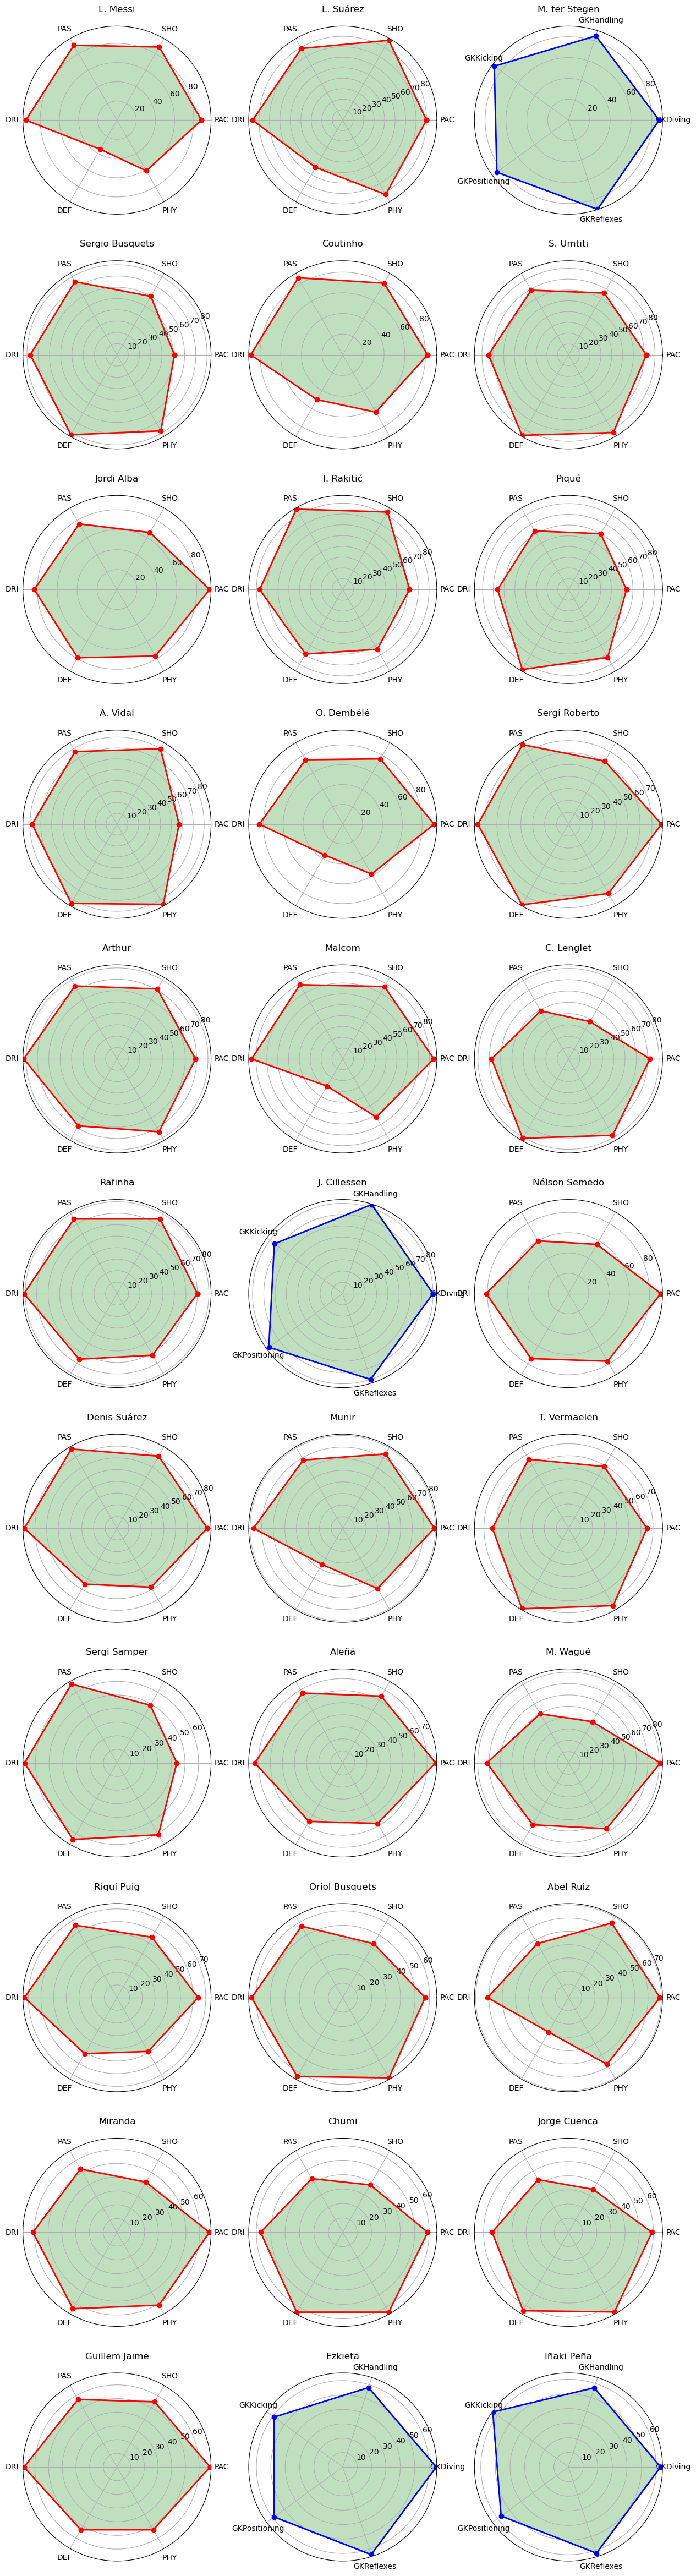

In [58]:

interact(club_players_plot, club_name = df.Club)

<a id='conclusions'></a>
# `4.` Conclusions

- Most player age is between 21 and 28
- only 5 % of palyers are over 33
- For players over 33 years old, 25% are GKs while (Strikers and Center Backs) represent roughly another 25%
- Most of the players are from England which is followed by Germany
- High overall rating and young age typically contribute to a player's value due to their potential to improve
- Five of the top ten clubs with average squad overall rating in **Serie A** (Juventus, Napoli, Inter, Milan, Roma)
- Six of the top ten clubs in the Premier League have the highest average player wages
    - This high investment in talent likely contributes to the league's significant marketing value by attracting star players and drawing a global audience.

- Both Real Madrid and Barcelona, the teams that compete in the most famous El Clásico in the world , paying highest player wages on average.
- Players who can play with both feet often have a high rating in ball control skills.
- Goalkeepers and center backs tend to be the players with the most height on average, which makes sense as they often need to reach high balls in the penalty area (box).
- There is a positive correlation between player height and heading accuracy
    - Center backs and strikers, typically have the most height on average due to the advantage it offers in aerial challenges.
